In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## About the dataset
### Expresso Churn Prediction Challenge

Expresso is an African telecommunications company that provides customers with airtime and mobile data bundles. The objective of this challenge is to develop a machine learning model to predict the likelihood of each Expresso customer “churning,” i.e. becoming inactive and not making any transactions for 90 days.

In [3]:
train = pd.read_csv('Train.csv')
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [4]:
test = pd.read_csv('Test.csv')
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42,On-net 1000F=10MilF;10d,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,NO,41,"Data: 100 F=40MB,24H",1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,NO,57,"Data: 100 F=40MB,24H",22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN


In [5]:
sample = pd.read_csv('SampleSubmission.csv')
sample.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0


__Sizes of the dataframes.__

In [6]:
print(train.shape)
print(test.shape)
print(sample.shape)

(2154048, 19)
(380127, 18)
(380127, 2)


Change column names to lowercase.

In [7]:
train = train.rename(columns=str.lower)
test = test.rename(columns=str.lower)
sample = sample.rename(columns=str.lower)

In [8]:
sample.churn.value_counts()

0    380127
Name: churn, dtype: int64

As we can see from the above, in 'sample' dataset all of the values for churn is 0. If all the target values in our test dataset will be 0, that wouldn't make any sense. That is why, we need to merge all these dataframes. Merge will be done by 'user_id'.

In [9]:
df1 = pd.merge(test, sample, on="user_id")
df1.head()

,user_id,region,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,zone1,zone2,mrg,regularity,top_pack,freq_top_pack,churn
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42,On-net 1000F=10MilF;10d,5.0,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,NO,41,"Data: 100 F=40MB,24H",1.0,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,NO,57,"Data: 100 F=40MB,24H",22.0,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN,0


Concatenate two tables.

In [10]:
frames = [train, df1]
data = pd.concat(frames)
data.head()

,user_id,region,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,zone1,zone2,mrg,regularity,top_pack,freq_top_pack,churn
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


Sizes of our final dataset.

In [11]:
data.shape

(2534175, 19)

Checking for null values in the dataset.

In [12]:
data.isnull().sum()

user_id                 0
region             999027
tenure                  0
montant            889794
frequence_rech     889794
revenue            853421
arpu_segment       853421
frequence          853421
data_volume       1247473
on_net             925189
orange            1052478
tigo              1517017
zone1             2334593
zone2             2373275
mrg                     0
regularity              0
top_pack          1061373
freq_top_pack     1061373
churn                   0
dtype: int64

In [13]:
# x = data.churn.value_counts().values
# sns.barplot([0,1], x).set_title('Target variable count');
# plt.title('Target variable count')

## Checking for Imbalance

In [14]:
data.churn.value_counts()

0    2130189
1     403986
Name: churn, dtype: int64

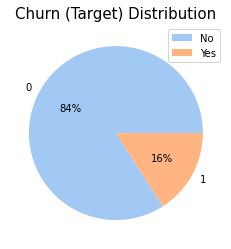

In [15]:
size = data.churn.value_counts()
labels = data.churn.value_counts().index
label=['No', 'Yes']
y = np.array(size)

colors = sns.color_palette('pastel')[0:2]
plt.pie(size, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend(label)
plt.title('Churn (Target) Distribution', fontsize=15)
plt.show()

## [models](https://www.kaggle.com/code/yasserhessein/airline-passenger-eda-7-algorithms-accuracy97)<br>
## [telecom project](https://www.kaggle.com/code/semihizinli/churn-telecom-project#3-|-Basic-Data-Analysis)

## Missing values

In [16]:
# Features with missing values
missing = data.isnull().sum().sort_values(ascending = False).head(20)
miss_percent = (missing/len(data))*100

# Percentage of missing values
pd.DataFrame({'missing values number': missing, '% of missing data': miss_percent.values})

,missing values number,% of missing data
zone2,2373275,93.650794
zone1,2334593,92.124380
tigo,1517017,59.862362
data_volume,1247473,49.226001
freq_top_pack,1061373,41.882388
top_pack,1061373,41.882388
orange,1052478,41.531386
region,999027,39.422179
on_net,925189,36.508489
montant,889794,35.111782


Installing 'missingno' package.<br>
__missingno__ - missing data visualization module for Python.

In [17]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

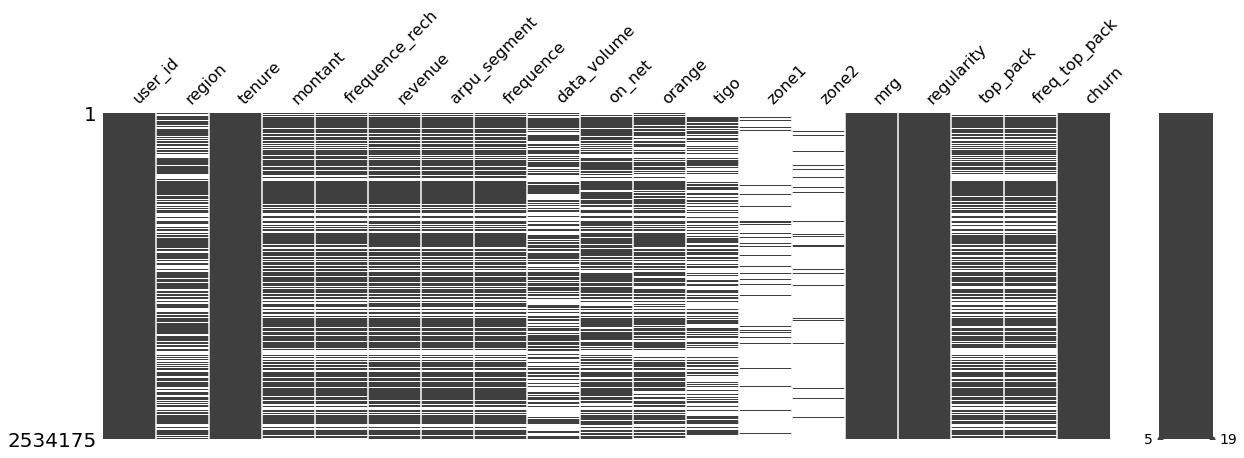

In [18]:
import missingno as mno

mno.matrix(data, figsize = (20, 6))

<AxesSubplot:>

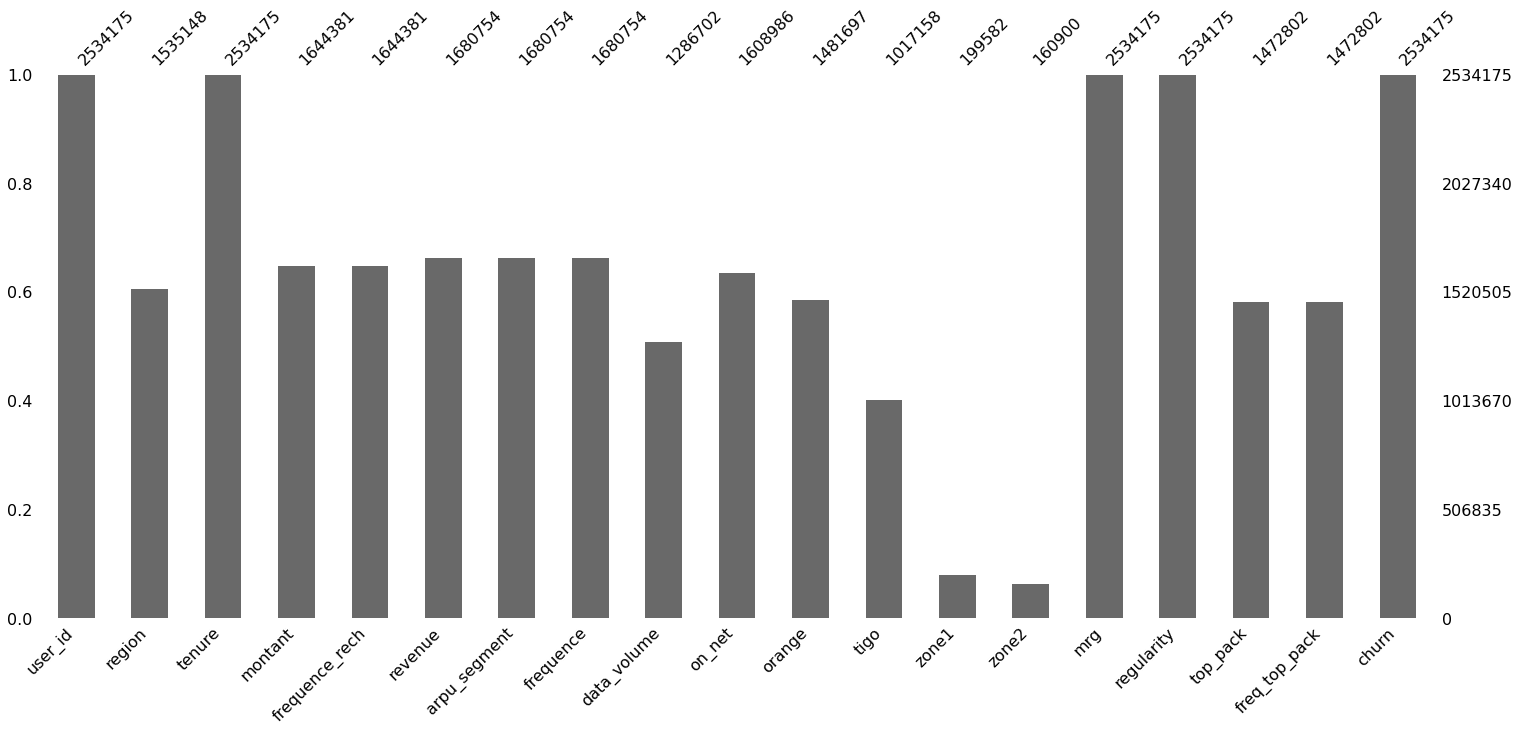

In [19]:
mno.bar(data)

<AxesSubplot:>

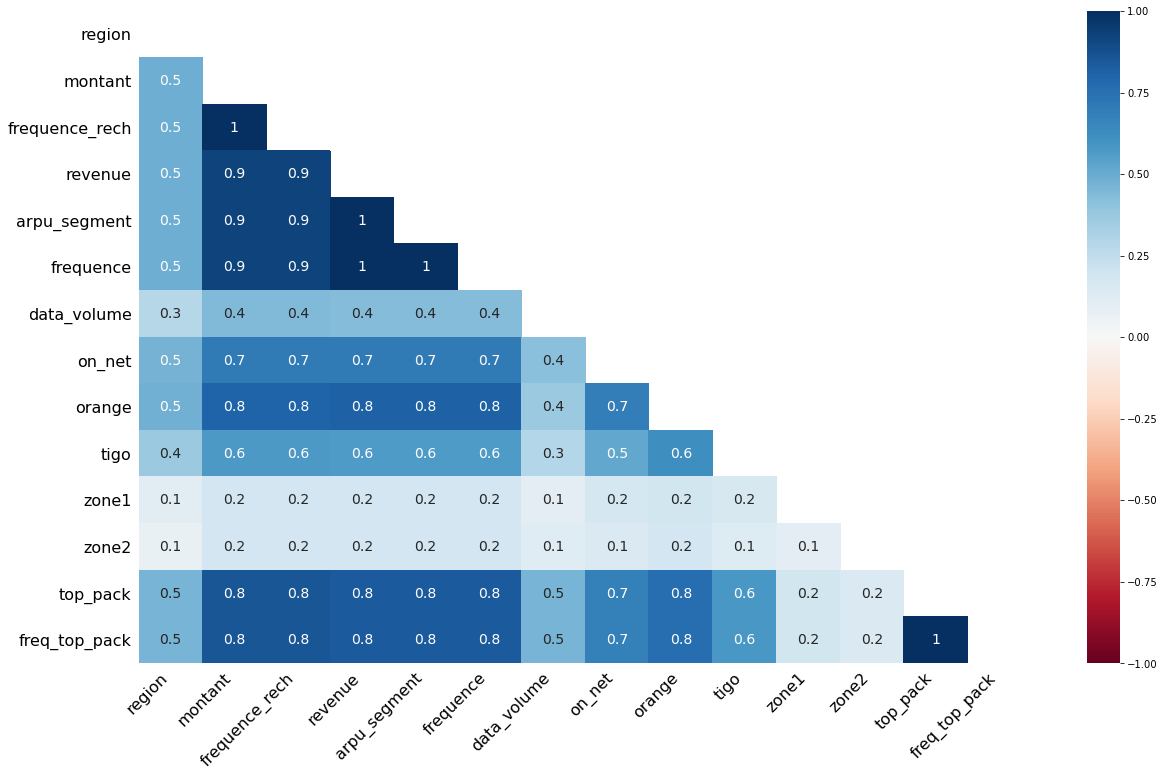

In [20]:
mno.heatmap(data)

The __heatmap function__ shows that there are strong correlations between missing values of different features. <br>
Low correlations indicate that the data are MAR(Missing at random).

<AxesSubplot:>

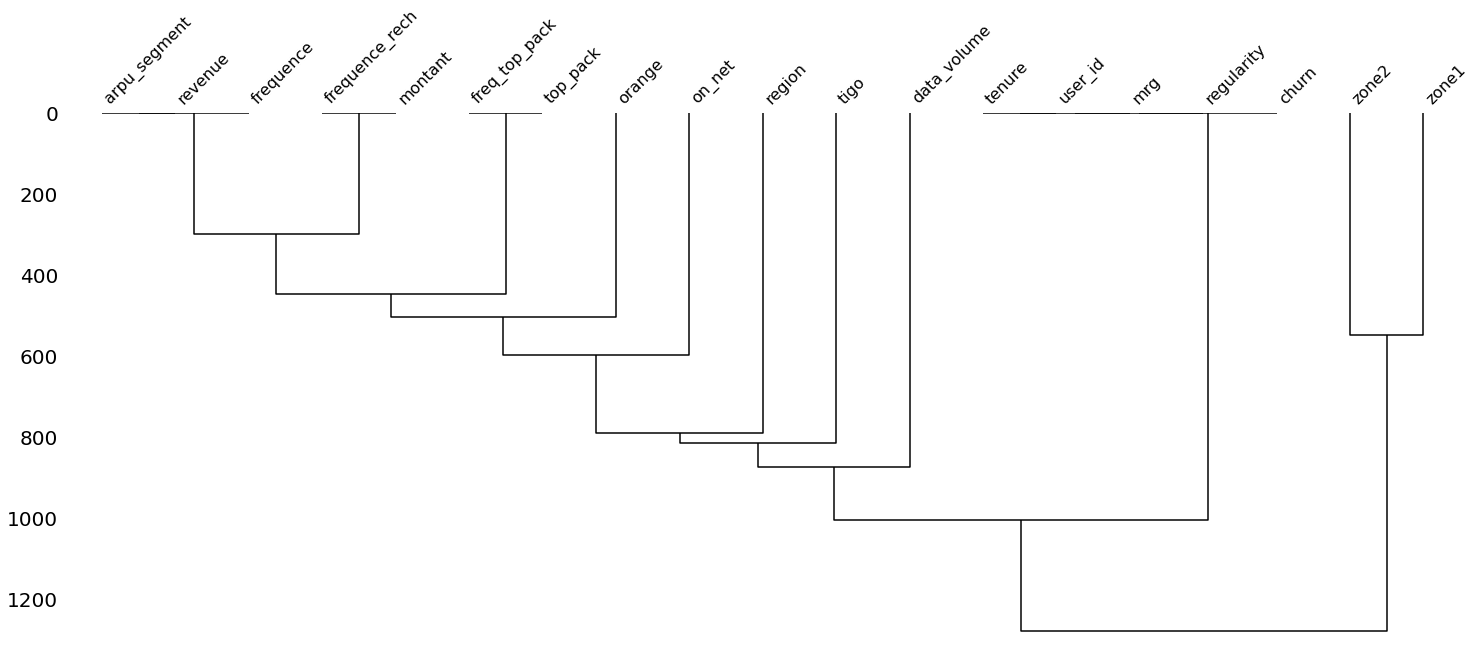

In [21]:
mno.dendrogram(data)

- Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on(missingno documentation)
- The missingness of __'on_net'__ tends to be more similar to __'orange'__ than to __'region'__ and so on. 

In [22]:
# dropping these 3 columns, because absense in these columns is correlated with absense in other columns
data.dropna(subset=['arpu_segment', 'revenue', 'frequence'], how = 'all', inplace=True)
data.shape

(1680754, 19)

In [23]:
data.isnull().sum()

user_id                 0
region             376770
tenure                  0
montant             62467
frequence_rech      62467
revenue                 0
arpu_segment            0
frequence               0
data_volume        566680
on_net             204695
orange             216149
tigo               671367
zone1             1488440
zone2             1520352
mrg                     0
regularity              0
top_pack           208033
freq_top_pack      208033
churn                   0
dtype: int64

<AxesSubplot:>

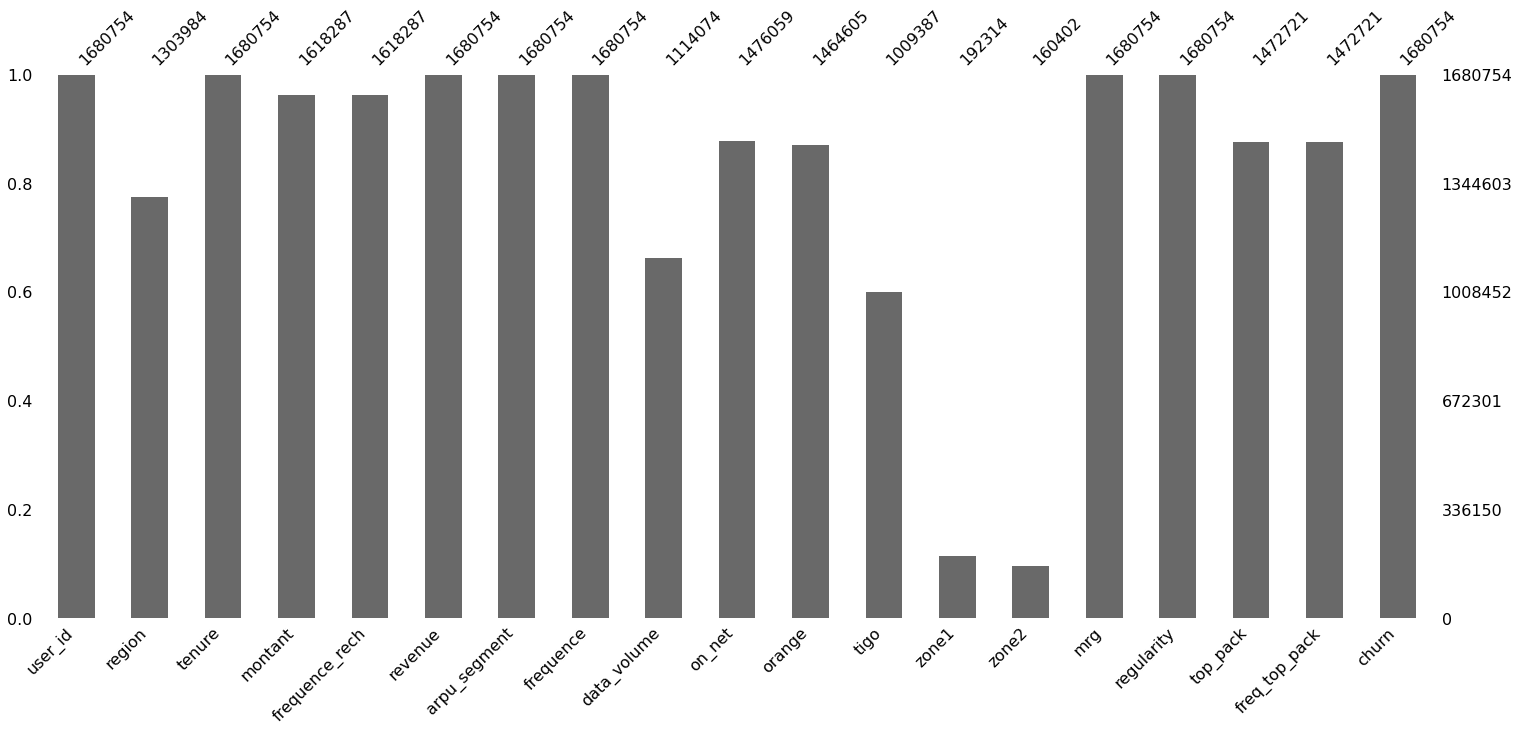

In [24]:
mno.bar(data)

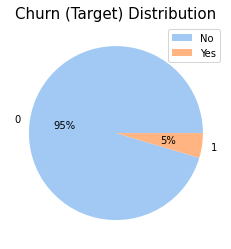

0    1603561
1      77193
Name: churn, dtype: int64


In [25]:
size = data.churn.value_counts()
labels = data.churn.value_counts().index
label=['No', 'Yes']
y = np.array(size)

colors = sns.color_palette('pastel')[0:2]
plt.pie(size, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend(label)
plt.title('Churn (Target) Distribution', fontsize=15)
plt.show()

print(data.churn.value_counts())

__Comment:__ As you can see, the target imbalance percentages has changed.

Percentages of missing values in 'zone1' and 'zone2' columns are greater than 90%. For that reason, we can drop those columns.<br>
Also 'user_id' column can be dropped, because it doesn't hold any crucial information, however we will use it later to merge tables.

In [26]:
data.drop(columns=['zone1', 'zone2'], axis=1, inplace=True)

In [27]:
# import seaborn as sns
# sns.pairplot(data)

## Correlation with other columns

In [28]:
data.corr()

,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,regularity,freq_top_pack,churn
montant,1.000000,0.790971,0.977077,0.977077,0.775424,0.300683,0.326491,0.658026,0.412533,0.518499,0.741025,-0.086068
frequence_rech,0.790971,1.000000,0.799879,0.799878,0.956089,0.152658,0.404968,0.518861,0.342987,0.552838,0.868894,-0.102603
revenue,0.977077,0.799879,1.000000,1.000000,0.785456,0.306957,0.331883,0.660904,0.412403,0.532010,0.750907,-0.104635
arpu_segment,0.977077,0.799878,1.000000,1.000000,0.785455,0.306957,0.331883,0.660905,0.412403,0.532008,0.750907,-0.104635
frequence,0.775424,0.956089,0.785456,0.785455,1.000000,0.169376,0.395269,0.471795,0.307009,0.591286,0.844751,-0.127918
data_volume,0.300683,0.152658,0.306957,0.306957,0.169376,1.000000,-0.023181,0.062469,0.022963,0.176390,0.118645,-0.010926
on_net,0.326491,0.404968,0.331883,0.331883,0.395269,-0.023181,1.000000,0.221391,0.137290,0.261084,0.356398,-0.042981
orange,0.658026,0.518861,0.660904,0.660905,0.471795,0.062469,0.221391,1.000000,0.405083,0.308927,0.553588,-0.057707
tigo,0.412533,0.342987,0.412403,0.412403,0.307009,0.022963,0.137290,0.405083,1.000000,0.193038,0.369002,-0.032287
regularity,0.518499,0.552838,0.532010,0.532008,0.591286,0.176390,0.261084,0.308927,0.193038,1.000000,0.446004,-0.278262


**'revenue'** and **'arpu_segment'** columns correlation is 1, that is why I can drop one of them.

In [29]:
data.drop(columns=['arpu_segment'], axis=1, inplace=True)

Get Correlation of "churn" column with other variables.

In [30]:
c = data.corr()['churn'].abs()
sc = c.sort_values()
a = dict(sc.tail(40))
b = a.keys()

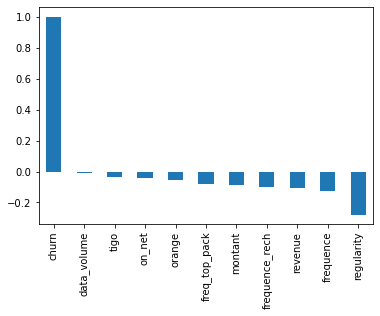

In [31]:
data[b].corr()['churn'].sort_values(ascending = False).plot(kind='bar');

The greatest correlation between target variable and __'regularity'__ column. The followings are 'frequence', 'revenue', 'frequence_rech' and so on.

In [32]:
data.nunique()

user_id           1680754
region                 14
tenure                  8
montant              7223
frequence_rech        126
revenue             39742
frequence              91
data_volume         43850
on_net              10320
orange               3283
tigo                 1376
mrg                     1
regularity             62
top_pack              142
freq_top_pack         257
churn                   2
dtype: int64

We can drop __'mrg'__ column because there is only one unique value.

In [33]:
data.drop(columns=['mrg'], axis=1, inplace=True)
data.shape

(1680754, 15)

In [34]:
# pip install lightgbm

In [35]:
# import lightgbm as lgb

In [36]:
# params = {
#    "monotone_constraints": [-1, 0, 1]
# }

In [37]:
data.nunique()

user_id           1680754
region                 14
tenure                  8
montant              7223
frequence_rech        126
revenue             39742
frequence              91
data_volume         43850
on_net              10320
orange               3283
tigo                 1376
regularity             62
top_pack              142
freq_top_pack         257
churn                   2
dtype: int64

## Outliers

In [38]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [39]:
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

churn              77193
data_volume       125949
freq_top_pack     107444
frequence          82171
frequence_rech    107672
montant            98102
on_net            213080
orange            153785
region                 0
regularity             0
revenue           107281
tenure                 0
tigo              117245
top_pack               0
user_id                0
dtype: int64

In [40]:
# def outliers(df, feature):
#     Q1= df[feature].quantile(0.25)
#     Q3 = df[feature].quantile(0.75)
#     IQR = Q3 - Q1
#     upper_limit = Q3 + 1.5 * IQR
#     lower_limit = Q1 - 1.5 * IQR
#     return upper_limit, lower_limit
# upper, lower = outliers(data, "data_volume")
# print("Upper whisker: ", upper)
# print("Lower Whisker: ", lower)

In [41]:
cols = ['data_volume', 'freq_top_pack', 'frequence', 'frequence_rech', 'montant', 'on_net', 'orange', 'tigo'] # one or more

Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [42]:
# 1680754, 14
data.shape

(1209381, 15)

## Filling Missing values
### Multivariate feature imputation

A more sophisticated [approach](https://scikit-learn.org/stable/modules/impute.html) is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

__Note__ This estimator is still experimental for now: default parameters or details of behaviour might change without any deprecation cycle. 

In [43]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
data["tenure1"] = ord_enc.fit_transform(data[["tenure"]])
data[["tenure1", "tenure"]].head(10)

,tenure1,tenure
0,7.0,K > 24 month
2,7.0,K > 24 month
4,7.0,K > 24 month
8,7.0,K > 24 month
11,7.0,K > 24 month
13,7.0,K > 24 month
14,7.0,K > 24 month
15,7.0,K > 24 month
25,7.0,K > 24 month
29,7.0,K > 24 month


### 'frequence_rech' and 'montant' columns

In [44]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [45]:
cols = ['tenure1', 'regularity', 'frequence', 'revenue', 'frequence_rech', 'montant']
X = data[cols]
X

,tenure1,regularity,frequence,revenue,frequence_rech,montant
0,7.0,54,17.0,4251.0,15.0,4250.0
2,7.0,17,2.0,1020.0,2.0,3600.0
4,7.0,11,1.0,985.0,1.0,1000.0
8,7.0,31,12.0,1502.0,3.0,1500.0
11,7.0,62,36.0,11870.0,27.0,12650.0
...,...,...,...,...,...,...
380114,7.0,20,10.0,1211.0,7.0,1600.0
380118,4.0,4,2.0,991.0,2.0,1000.0
380120,7.0,52,7.0,3299.0,7.0,3300.0
380124,7.0,15,10.0,3949.0,7.0,3950.0


In [46]:
impute_it = IterativeImputer(max_iter=10, random_state=42)
impute_it = impute_it.fit_transform(X)
k = pd.DataFrame(impute_it, columns=cols)
k.head()

,tenure1,regularity,frequence,revenue,frequence_rech,montant
0,7.0,54.0,17.0,4251.0,15.0,4250.0
1,7.0,17.0,2.0,1020.0,2.0,3600.0
2,7.0,11.0,1.0,985.0,1.0,1000.0
3,7.0,31.0,12.0,1502.0,3.0,1500.0
4,7.0,62.0,36.0,11870.0,27.0,12650.0


Renaming columns because later when we merge them with 'data' dataframe, problems won't appear.

In [47]:
k = k.rename({'frequence_rech': 'frequence_rech1'}, axis=1)
k = k.rename({'montant': 'montant1'}, axis=1)
data.head()

,user_id,region,tenure,montant,frequence_rech,revenue,frequence,data_volume,on_net,orange,tigo,regularity,top_pack,freq_top_pack,churn,tenure1
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,17.0,4.0,388.0,46.0,1.0,54,On net 200F=Unlimited _call24H,8.0,0,7.0
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,2.0,NaN,90.0,46.0,7.0,17,On-net 1000F=10MilF;10d,1.0,0,7.0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,1.0,NaN,39.0,24.0,NaN,11,Mixt 250F=Unlimited_call24H,2.0,0,7.0
8,0000398021ccd3a488fa1a63dee3b2f0d471f9fd,DAKAR,K > 24 month,1500.0,3.0,1502.0,12.0,NaN,2.0,53.0,2.0,31,NaN,NaN,0,7.0
11,00005b7c61f811e4eef1a05903a4b700afd23e46,KAOLACK,K > 24 month,12650.0,27.0,11870.0,36.0,8453.0,431.0,66.0,6.0,62,On net 200F=Unlimited _call24H,11.0,0,7.0


In [48]:
data.reset_index(inplace=True)
data.head()

,index,user_id,region,tenure,montant,frequence_rech,revenue,frequence,data_volume,on_net,orange,tigo,regularity,top_pack,freq_top_pack,churn,tenure1
0,0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,17.0,4.0,388.0,46.0,1.0,54,On net 200F=Unlimited _call24H,8.0,0,7.0
1,2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,2.0,NaN,90.0,46.0,7.0,17,On-net 1000F=10MilF;10d,1.0,0,7.0
2,4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,1.0,NaN,39.0,24.0,NaN,11,Mixt 250F=Unlimited_call24H,2.0,0,7.0
3,8,0000398021ccd3a488fa1a63dee3b2f0d471f9fd,DAKAR,K > 24 month,1500.0,3.0,1502.0,12.0,NaN,2.0,53.0,2.0,31,NaN,NaN,0,7.0
4,11,00005b7c61f811e4eef1a05903a4b700afd23e46,KAOLACK,K > 24 month,12650.0,27.0,11870.0,36.0,8453.0,431.0,66.0,6.0,62,On net 200F=Unlimited _call24H,11.0,0,7.0


In [49]:
data.drop(columns=['index'], inplace=True)

In [50]:
extracted_col = k[["frequence_rech1", 'montant1']]
data = data.merge(extracted_col, on=data.index)
data.head(5)

,key_0,user_id,region,tenure,montant,frequence_rech,revenue,frequence,data_volume,on_net,orange,tigo,regularity,top_pack,freq_top_pack,churn,tenure1,frequence_rech1,montant1
0,0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,17.0,4.0,388.0,46.0,1.0,54,On net 200F=Unlimited _call24H,8.0,0,7.0,15.0,4250.0
1,1,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,2.0,NaN,90.0,46.0,7.0,17,On-net 1000F=10MilF;10d,1.0,0,7.0,2.0,3600.0
2,2,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,1.0,NaN,39.0,24.0,NaN,11,Mixt 250F=Unlimited_call24H,2.0,0,7.0,1.0,1000.0
3,3,0000398021ccd3a488fa1a63dee3b2f0d471f9fd,DAKAR,K > 24 month,1500.0,3.0,1502.0,12.0,NaN,2.0,53.0,2.0,31,NaN,NaN,0,7.0,3.0,1500.0
4,4,00005b7c61f811e4eef1a05903a4b700afd23e46,KAOLACK,K > 24 month,12650.0,27.0,11870.0,36.0,8453.0,431.0,66.0,6.0,62,On net 200F=Unlimited _call24H,11.0,0,7.0,27.0,12650.0


In [51]:
data.drop(columns=['frequence_rech', 'montant'], inplace=True)

<AxesSubplot:>

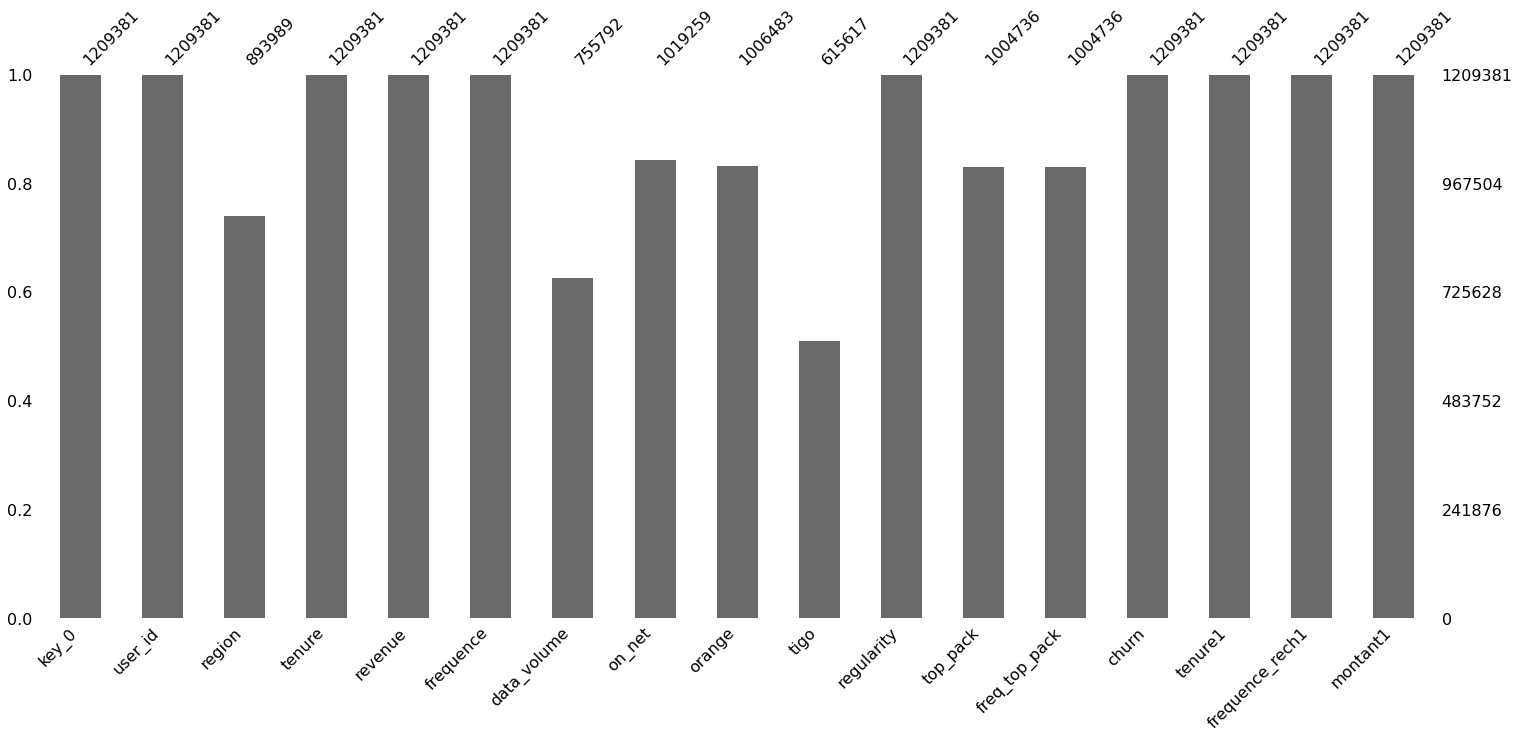

In [52]:
mno.bar(data)

In [53]:
data['top_pack']=data['top_pack'].factorize()[0]
# -1 is nan values in 'top_pack'
data['top_pack'].replace({-1: np.nan }, inplace=True)

### 'top_pack' and 'freq_top_pack' columns

In [54]:
cols = ['regularity', 'frequence', 'top_pack', 'freq_top_pack']
X2 = data[cols]

In [55]:
impute_it2 = IterativeImputer(max_iter=10, random_state=42)
impute_it2 = impute_it2.fit_transform(X2)
m = pd.DataFrame(impute_it2, columns=cols)
m.rename({'top_pack': 'top_pack1'}, axis=1, inplace=True)
m.rename({'freq_top_pack': 'freq_top_pack1'}, axis=1, inplace=True)
m

,regularity,frequence,top_pack1,freq_top_pack1
0,54.0,17.0,0.000000,8.000000
1,17.0,2.0,1.000000,1.000000
2,11.0,1.0,2.000000,2.000000
3,31.0,12.0,7.628829,5.832477
4,62.0,36.0,0.000000,11.000000
...,...,...,...,...
1209376,20.0,10.0,2.000000,2.000000
1209377,4.0,2.0,6.000000,2.000000
1209378,52.0,7.0,3.000000,4.000000
1209379,15.0,10.0,24.000000,6.000000


In [56]:
data.drop('key_0', axis=1, inplace=True)

In [57]:
extracted_col = m[["top_pack1", 'freq_top_pack1']]
data = data.merge(extracted_col, on=data.user_id)

In [58]:
data.drop(columns=['top_pack', 'freq_top_pack'], axis=1, inplace=True)
data.isnull().sum()

key_0                   0
user_id                 0
region             315392
tenure                  0
revenue                 0
frequence               0
data_volume        453589
on_net             190122
orange             202898
tigo               593764
regularity              0
churn                   0
tenure1                 0
frequence_rech1         0
montant1                0
top_pack1               0
freq_top_pack1          0
dtype: int64

## hhhhhhhhhhhhhhhh

In [59]:
data.drop(columns=['user_id', 'tenure'], inplace=True)

## 'data_volume' column

In [60]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [61]:
lr = LinearRegression()
list1=['tigo', 'data_volume', 'on_net', 'orange', 'key_0', 'region', 'churn']
testdf = data[data['data_volume'].isnull()==True]
traindf = data[data['data_volume'].isnull()==False]
y = traindf['data_volume']
traindf.drop(columns=list1,axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop(columns=list1,axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['data_volume']= pred

In [62]:
df_out = pd.merge(traindf,y,how = 'left',left_index = True, right_index = True) # rename to traindf1
frames = [df_out, testdf]
result = pd.concat(frames)
data = pd.merge(data,result['data_volume'], how = 'left',left_index = True, right_index = True) 
data

,key_0,region,revenue,frequence,data_volume_x,on_net,orange,tigo,regularity,churn,tenure1,frequence_rech1,montant1,top_pack1,freq_top_pack1,data_volume_y
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,4251.0,17.0,4.0,388.0,46.0,1.0,54,0,7.0,15.0,4250.0,0.000000,8.000000,4.000000
1,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,1020.0,2.0,NaN,90.0,46.0,7.0,17,0,7.0,2.0,3600.0,1.000000,1.000000,439.918149
2,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,985.0,1.0,NaN,39.0,24.0,NaN,11,0,7.0,1.0,1000.0,2.000000,2.000000,443.580494
3,0000398021ccd3a488fa1a63dee3b2f0d471f9fd,DAKAR,1502.0,12.0,NaN,2.0,53.0,2.0,31,0,7.0,3.0,1500.0,7.628829,5.832477,1267.318209
4,00005b7c61f811e4eef1a05903a4b700afd23e46,KAOLACK,11870.0,36.0,8453.0,431.0,66.0,6.0,62,0,7.0,27.0,12650.0,0.000000,11.000000,8453.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209376,fffd001329be40a6ed312c5b9c3467bb49972b48,DAKAR,1211.0,10.0,170.0,6.0,21.0,1.0,20,0,7.0,7.0,1600.0,2.000000,2.000000,170.000000
1209377,fffe4dfd57392c8d7ddfd48cb51bef3c8adb0892,NaN,991.0,2.0,1507.0,NaN,0.0,NaN,4,0,4.0,2.0,1000.0,6.000000,2.000000,1507.000000
1209378,fffe5c84e3db939182ee2a3a3123920025eca8a3,SAINT-LOUIS,3299.0,7.0,NaN,80.0,80.0,NaN,52,0,7.0,7.0,3300.0,3.000000,4.000000,1474.405402
1209379,ffff0dcc1ab9812bf205b6d76e9d084053cd96f5,NaN,3949.0,10.0,1724.0,25.0,71.0,NaN,15,0,7.0,7.0,3950.0,24.000000,6.000000,1724.000000


In [63]:
data.drop('data_volume_x', axis=1, inplace=True)

## 'on_net' column

In [64]:
lr = LinearRegression()
list1=['on_net', 'orange', 'tigo', 'key_0', 'region', 'churn']
testdf = data[data['on_net'].isnull()==True]
traindf = data[data['on_net'].isnull()==False]
y = traindf['on_net']
traindf.drop(columns=list1,axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop(columns=list1,axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['on_net']= pred

In [65]:
df_out = pd.merge(traindf, y, how = 'left', left_index = True, right_index = True) # rename to traindf1

In [66]:
frames = [df_out, testdf]
result = pd.concat(frames)
data = pd.merge(data, result['on_net'], how = 'left',left_index = True, right_index = True) 

In [67]:
data.drop('on_net_x', axis=1, inplace=True)

## 'tigo' column

In [68]:
cols = ['revenue', 'tenure1', 'regularity', 'frequence', 'tigo']
X3 = data[cols]

impute_it3 = IterativeImputer(max_iter=10, random_state=42)
impute_it3 = impute_it3.fit_transform(X3)
m = pd.DataFrame(impute_it3, columns=cols)
m.rename({'tigo': 'tigo1'}, axis=1, inplace=True)

In [69]:
data.drop('key_0', axis=1, inplace=True)
data = data.merge(m['tigo1'], on=data.index)
data.drop('tigo', axis=1, inplace=True)

Since initially the type of __'tigo'__ column was integer, I convert it from float to integer type.

In [70]:
data['tigo1'] = data['tigo1'].astype('int')

## 'region' column

In [71]:
data.drop('key_0', axis=1, inplace=True)

In [72]:
data['region']=data['region'].factorize()[0]
# replace -1 with NaN value
data['region'] = data['region'].replace(-1, np.nan)

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
neigh = KNeighborsClassifier(n_neighbors=3)
list1=['orange', 'region', 'churn']
testdf1 = data[data['region'].isnull()==True]
traindf1 = data[data['region'].isnull()==False]
y = traindf1['region']
traindf1.drop(columns=list1,axis=1,inplace=True)
neigh.fit(traindf1,y)
testdf1.drop(columns=list1,axis=1,inplace=True)
pred = neigh.predict(testdf1)
testdf1['region']= pred

In [75]:
df_out = pd.merge(traindf1, y, how = 'left', left_index = True, right_index = True) # rename to traindf1
frames = [df_out, testdf1]
result = pd.concat(frames)
data = pd.merge(data,result['region'], how = 'left',left_index = True, right_index = True) 

In [76]:
data.drop('region_x', axis=1, inplace=True)

## "orange" column

In [78]:
data.orange.value_counts()

1.0      70405
0.0      63164
2.0      50781
3.0      36669
4.0      34690
         ...  
230.0      388
227.0      385
237.0      383
236.0      367
238.0      355
Name: orange, Length: 239, dtype: int64

In [79]:
data.orange.nunique()

239

In [80]:
lr = LinearRegression()
testdf = data[data['orange'].isnull()==True]
traindf = data[data['orange'].isnull()==False]
y = traindf['orange']
traindf.drop(['orange', 'churn'],axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop(['orange', 'churn'],axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['orange']= pred

In [81]:
df_out = pd.merge(traindf, y, how = 'left', left_index = True, right_index = True) # rename to traindf1
frames = [df_out, testdf]
result = pd.concat(frames)
data = pd.merge(data, result['orange'], how = 'left',left_index = True, right_index = True) 

In [82]:
data.drop('orange_x', axis=1, inplace=True)

In [83]:
data.isnull().sum()

revenue            0
frequence          0
regularity         0
churn              0
tenure1            0
frequence_rech1    0
montant1           0
top_pack1          0
freq_top_pack1     0
data_volume_y      0
on_net_y           0
tigo1              0
region_y           0
orange_y           0
dtype: int64

## Algorithms which handle missing values
Some algprithms like XGBoost and LightGBM can handle missing values without any preprocessing, by supplying relevant parameters.

- #### XGBoost

- #### LightGBm

## XGBoost

In [84]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [85]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [86]:
X = data.drop('churn', axis=1)
Y = data.churn

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [87]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.27%


We can see 94.27% accuracy, we are getting very high accuracy because it is predicting mostly the majority class

## Dealing with imbalance
[Dealinng with an imbalance](https://www.kaggle.com/code/prasathm2001/undersampling-in-wine-quality)

### Undersampling method
__Undersampling__ - downsize the majority class to balance with the minority class.

- **Simple random undersampling:** the basic approach of random sampling from the majority class.
- **Undersampling using K-Means:** synthesize based on the cluster centroids.
- **Undersampling using Tomek links**: detects and removes samples from Tomek links

https://www.justintodata.com/imbalanced-data-machine-learning-classification/

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
data=data.astype('int32')
data.dtypes

revenue            int32
frequence          int32
regularity         int32
churn              int32
tenure1            int32
frequence_rech1    int32
montant1           int32
top_pack1          int32
freq_top_pack1     int32
data_volume_y      int32
on_net_y           int32
tigo1              int32
region_y           int32
orange_y           int32
dtype: object

In [90]:
X = data.drop(columns=['churn'], axis=1)
Y = data.churn

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [91]:
# from imblearn.combine import SMOTETomek

# smote_tomek = SMOTETomek(random_state=888)
# X_train, y_train = smote_tomek.fit_resample(X_train, y_train)
# y_train.value_counts()

### Undersampling

Undersample method suits the best because, we have got too many observations.

In [92]:
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority')
X_train, y_train = undersample.fit_resample(X_train, y_train)
y_train.value_counts()

0    47341
1    47341
Name: churn, dtype: int64

# Models

### Linear Models:
 
- Logistic Regression
- Support Vector Machines

 

### Non-linear Models:
    
- K-Nearest Neighbours
- Kernel SVM
- Naïve Bayes
- Decision Tree Classification
- Random Forest Classification

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import plot_roc_curve
import sklearn.metrics as metrics
import matplotlib.pyplot as plt


def modeling1(alg, params={}):
    #Instantiating the algorithm class and unpacking parameters if any
    model = alg(**params) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test, y_pred) )
    
    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(F'Accuracy:',accuracy_score(y_true, y_pred))
        print(F'Precision:', precision_score(y_true, y_pred))
        print(F'Recall:', recall_score(y_true, y_pred))
        print(F'F1 Score:', f1_score(y_true, y_pred))
    print_scores(alg, y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    #Create the Confusion Matrix Display Object(cmd_obj). 
    print('Confusion matrix:')
    print(cm)
    cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['churn', 'notChurn'])

    #The plot() function has to be called for the sklearn visualization
    cmd_obj.plot()

    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
    cmd_obj.ax_.set(
                    title='Sklearn Confusion Matrix with labels!!', 
                    xlabel='Predicted Churn', 
                    ylabel='Actual Churn')
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
    plt.show()
    plot_roc_curve(model, X_test, y_test)
    plt.title('ROC Curve')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.show()
    
    return model

In [94]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression

              precision    recall  f1-score   support

           0       0.99      0.72      0.84    375651
           1       0.16      0.83      0.27     23445

    accuracy                           0.73    399096
   macro avg       0.57      0.78      0.55    399096
weighted avg       0.94      0.73      0.80    399096

Accuracy: 0.7308742758634514
Precision: 0.15788444299568088
Recall: 0.8263595649392195
F1 Score: 0.2651158017173549
Confusion matrix:
[[272315 103336]
 [  4071  19374]]


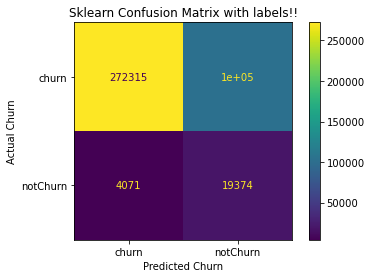

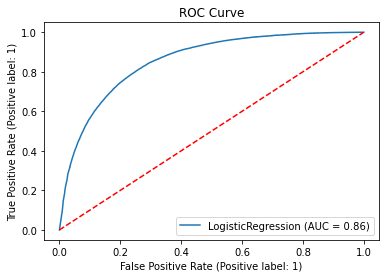

In [96]:
logreg = modeling1(LogisticRegression)

## Decision Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.97      0.69      0.81    375651
           1       0.12      0.70      0.21     23445

    accuracy                           0.70    399096
   macro avg       0.55      0.70      0.51    399096
weighted avg       0.92      0.70      0.78    399096

Accuracy: 0.6950032072483814
Precision: 0.12468111757786841
Recall: 0.6962678609511623
F1 Score: 0.21149050015870857
Confusion matrix:
[[261049 114602]
 [  7121  16324]]


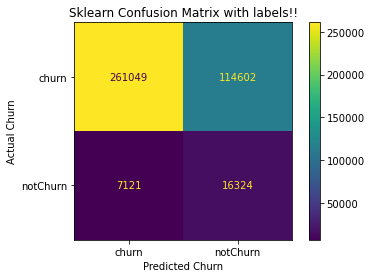

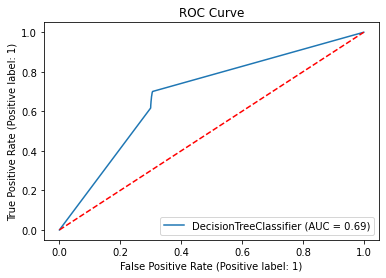

In [98]:
tree = modeling1(DecisionTreeClassifier)

## KNN

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
# knn = modeling1(KNeighborsClassifier)

## Random Forest Classifier

In [101]:
from sklearn.ensemble import RandomForestClassifier

              precision    recall  f1-score   support

           0       0.98      0.77      0.86    375651
           1       0.17      0.78      0.28     23445

    accuracy                           0.77    399096
   macro avg       0.58      0.77      0.57    399096
weighted avg       0.93      0.77      0.83    399096

Accuracy: 0.7703910838494998
Precision: 0.17417314106055828
Recall: 0.7773939006184688
F1 Score: 0.2845855974017863
Confusion matrix:
[[289234  86417]
 [  5219  18226]]


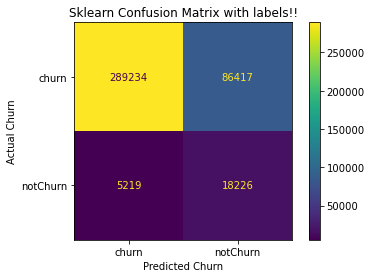

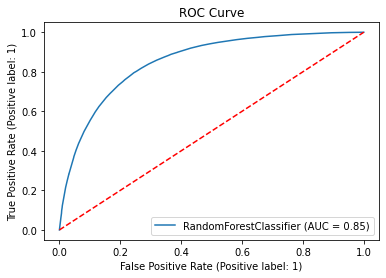

In [102]:
forest = modeling1(RandomForestClassifier)

## XGBoost

              precision    recall  f1-score   support

           0       0.98      0.76      0.86    375651
           1       0.17      0.80      0.28     23445

    accuracy                           0.76    399096
   macro avg       0.58      0.78      0.57    399096
weighted avg       0.94      0.76      0.82    399096

Accuracy: 0.7626360574899272
Precision: 0.17253132924185072
Recall: 0.8009810194071231
F1 Score: 0.2839087150103183
Confusion matrix:
[[285586  90065]
 [  4666  18779]]


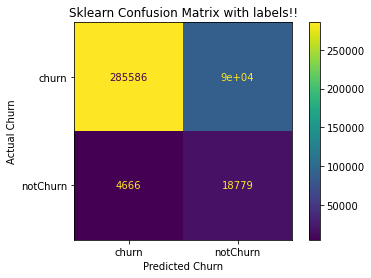

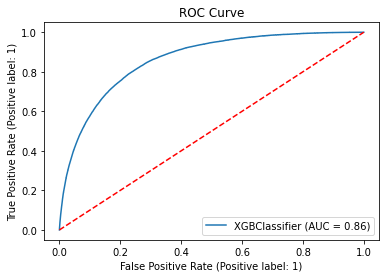

In [103]:
xgb = modeling1(XGBClassifier)

## GaussianNB

In [104]:
from sklearn.naive_bayes import GaussianNB

              precision    recall  f1-score   support

           0       0.98      0.54      0.69    375651
           1       0.10      0.85      0.18     23445

    accuracy                           0.55    399096
   macro avg       0.54      0.69      0.44    399096
weighted avg       0.93      0.55      0.66    399096

Accuracy: 0.5548664982861267
Precision: 0.10225842395229351
Recall: 0.8455107698869695
F1 Score: 0.18245074713410678
Confusion matrix:
[[201622 174029]
 [  3622  19823]]


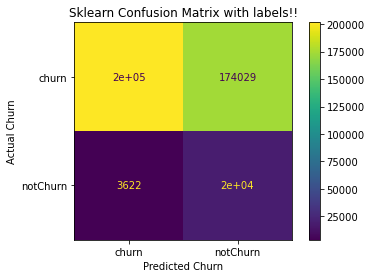

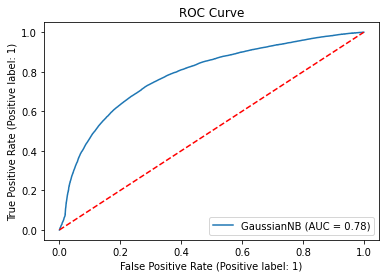

In [105]:
nb = modeling1(GaussianNB)

## Support Vector Machine

In [106]:
# from sklearn import svm
# svm = modeling1(svm.SVC)

## Altogether

<Figure size 1800x1800 with 0 Axes>

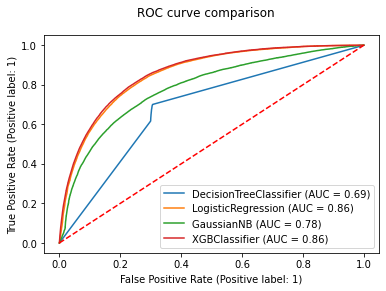

In [107]:
plt.figure(figsize=(25, 25))

fig = plot_roc_curve(tree, X_test, y_test)
fig = plot_roc_curve(logreg, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(nb, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(xgb, X_test, y_test, ax = fig.ax_)

fig.figure_.suptitle("ROC curve comparison")
plt.plot([0, 1], [0, 1], 'r--')
plt.show()